# Data Cleaning and Wrangling Practice

### Objectives:
* Load, clean, and explore real-world datasets using Python and pandas.
* Generate insights through descriptive statistics and visualizations.
* Communicate findings effectively via notebooks and charts.
* Apply data analysis skills to a project using a public dataset.

### Public dataset source:
[Kaggle Food choices and preferences of college students](https://www.kaggle.com/datasets/borapajo/food-choices?select=codebook_food.docx)
This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students. Data is raw and uncleaned.

In [48]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

## Discovery: Understanding the data, its structure, and what it contains

In [16]:
# Establish file path and import data
path = 'food_coded.csv'
data = pd.read_csv(path)

# Look at a snapshot of the data
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [27]:
df.describe()

,GPA,Gender,grade_level,parents_cook,weight,cook,eating_out,ethnic_food,fruit_day,veggies_day,healthy_feeling,self_perception_weight,vitamins,fav_cuisine_coded
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,3.418936,1.392000,2.376000,1.528000,158.360000,2.792000,2.56000,3.744000,4.224000,4.008000,5.456000,3.120000,1.512000,2.424000
std,0.382553,0.490161,1.133536,0.746778,31.119022,1.026236,1.13876,1.177093,0.923388,1.081337,2.585643,1.111523,0.501867,1.947968
min,2.200000,1.000000,1.000000,1.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.200000,1.000000,1.000000,1.000000,135.000000,2.000000,2.00000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000
50%,3.500000,1.000000,2.000000,1.000000,155.000000,3.000000,2.00000,4.000000,5.000000,4.000000,5.000000,3.000000,2.000000,1.000000
75%,3.700000,2.000000,3.000000,2.000000,180.000000,3.000000,3.00000,5.000000,5.000000,5.000000,8.000000,4.000000,2.000000,4.000000
max,4.000000,2.000000,4.000000,5.000000,265.000000,5.000000,5.00000,5.000000,5.000000,5.000000,10.000000,6.000000,2.000000,8.000000


In [9]:
# Preview all the columns and their quantity
print(len(data.columns))
print(data.columns)

61
Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
    

## Cleaning: Modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted

In [17]:
# Convert GPA and weight data from object to floats
data['GPA'] = pd.to_numeric(data['GPA'], errors='coerce')
# print(data['GPA'])

data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
# print(data['weight'])

In [18]:
# Identify open-ended questions and remove data entries
text_cols = data.select_dtypes(include=['object', 'string']).columns
print(text_cols)
print('Removing ',len(text_cols), ' columns')

df = data.drop(columns=text_cols)
print(df.columns)
print('Now with ',len(df.columns), ' columns')

Index(['comfort_food', 'comfort_food_reasons', 'diet_current',
       'eating_changes', 'father_profession', 'fav_cuisine', 'food_childhood',
       'healthy_meal', 'ideal_diet', 'meals_dinner_friend',
       'mother_profession', 'type_sports'],
      dtype='object')
Removing  12  columns
Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded',
       'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out',
       'employment', 'ethnic_food', 'exercise', 'father_education',
       'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level',
       'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income',
       'indian_food', 'italian_food', 'life_rewarding', 'marital_status',
       'mother_education', 'nutritional_check', 'on_off_campus',
       'parents_cook', 'pay_meal_out', 'persian_food',
    

In [19]:
# Check for null values
print(df.isna().sum())

GPA                              5
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current_coded               0
drink                            2
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
fav_cuisine_coded                0
fav_food                         2
fries                            0
fruit_day                        0
grade_level                      0
greek_food                       0
healthy_feeling                  0
ideal_diet_coded                 0
income              

In [22]:
# Decisions based on data visualization performed down below
# GPA and weight replace with either median because data are skewed and there are several outliers
df['GPA'] = df['GPA'].fillna(df['GPA'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())

# Self-perception of weight and Cook replace with most common class (mode) for categorical
df['self_perception_weight'] = df['self_perception_weight'].fillna(df['self_perception_weight'].mode()[0])
df['cook'] = df['cook'].fillna(df['cook'].mode()[0])

# Remove marital status, very heavily skewed and not useful for college student population
# Remove more columns with too many missing values
remove_NAcolumns = ['marital_status','exercise','cuisine', 'comfort_food_reasons_coded']
df = df.drop(columns=remove_NAcolumns)

In [ ]:
# Significantly cut down on the size of the dataset
# Keep only columns of interest
columns_of_interest = ['GPA','Gender','grade_level','parents_cook','weight','cook','eating_out','ethnic_food','fruit_day','veggies_day','healthy_feeling','self_perception_weight','vitamins','fav_cuisine_coded']
df = df[columns_of_interest]

# Verify no null values left
print(df.isna().sum())

GPA                       0
Gender                    0
grade_level               0
parents_cook              0
weight                    0
cook                      0
eating_out                0
ethnic_food               0
fruit_day                 0
veggies_day               0
healthy_feeling           0
self_perception_weight    0
vitamins                  0
fav_cuisine_coded         0
dtype: int64


In [26]:
# Check to see if there are any duplicate rows
df.duplicated().sum()

0

## Exploratory data analysis and Visualization: descriptive statistics, correlations, basic visualizations

In [28]:
# Display a few averages
ave_GPA = np.mean(df['GPA'])
ave_weight = np.mean(df['weight'])
print('Average GPA is:', ave_GPA)
print('Average weight is', ave_weight,'lbs')

Average GPA is: 3.418936
Average weight is 158.36 lbs


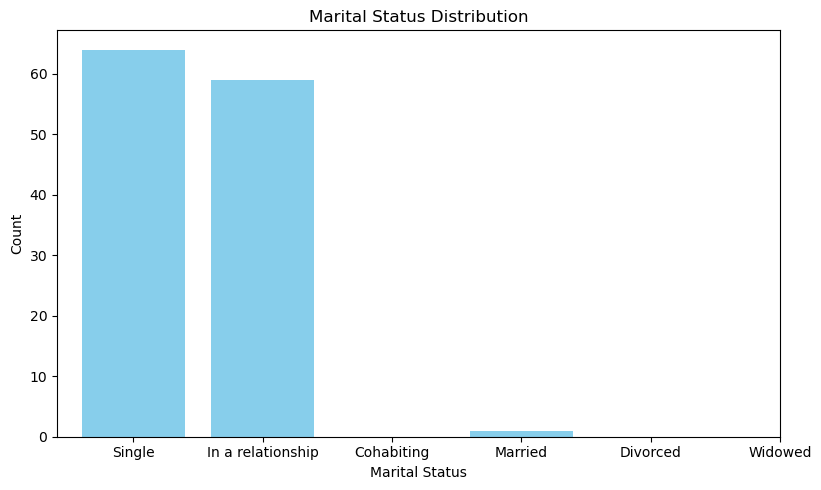

In [30]:
# Visualize marital status
# Count occurrences
marital_counts = data['marital_status'].value_counts()

labels = ['Single','In a relationship','Cohabiting','Married','Divorced','Widowed']

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(marital_counts.index, marital_counts.values, color='skyblue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(ticks=range(1, 7), labels=labels)
plt.show()

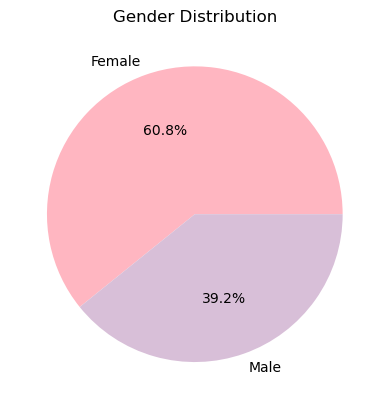

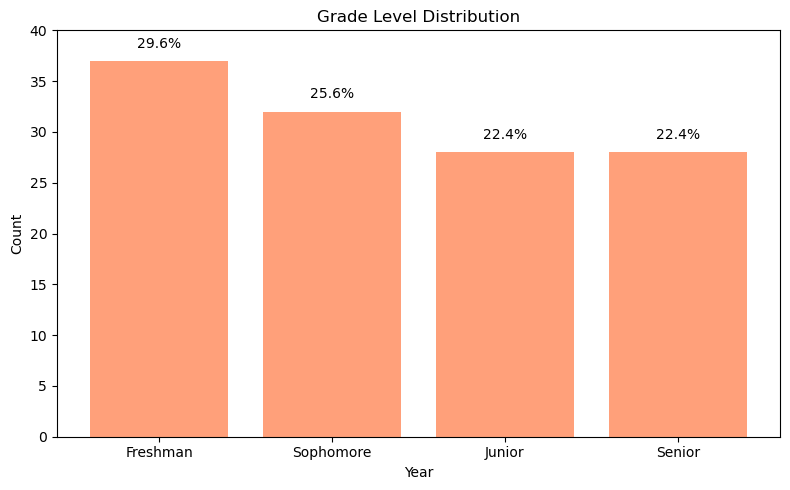

In [32]:
# Visualize Gender
# Count occurrences
gender_counts = data['Gender'].value_counts()
# The index is the unique categories
# The values are the number of occurrences

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(gender_counts.values, labels=['Female','Male'], autopct='%1.1f%%', colors=['lightpink','thistle'])
ax.set_title('Gender Distribution')
plt.show()


# Count occurrences
grade_counts = data['grade_level'].value_counts()
# The index is the unique categories
# The values are the number of occurrences

labels = ['Freshman','Sophomore','Junior','Senior']

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(grade_counts.index, grade_counts.values, color='lightsalmon')
total = grade_counts.values.sum()
for bar in bars:
    height = bar.get_height()
    percentage = 100 * height / total
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.title('Grade Level Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.ylim(0,40)
plt.xticks(ticks=range(1, 5), labels=labels)
plt.show()

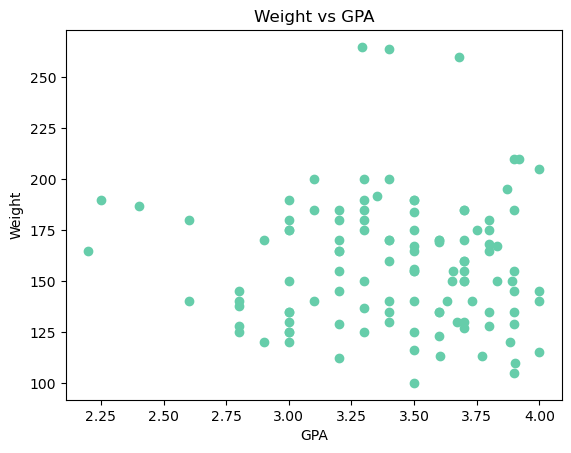

In [33]:
# VIsualize GPA
x = data['GPA']
y = data['weight']
plt.scatter(x, y, color = 'mediumaquamarine')
plt.xlabel('GPA')
plt.ylabel('Weight')
plt.title('Weight vs GPA')
plt.show()

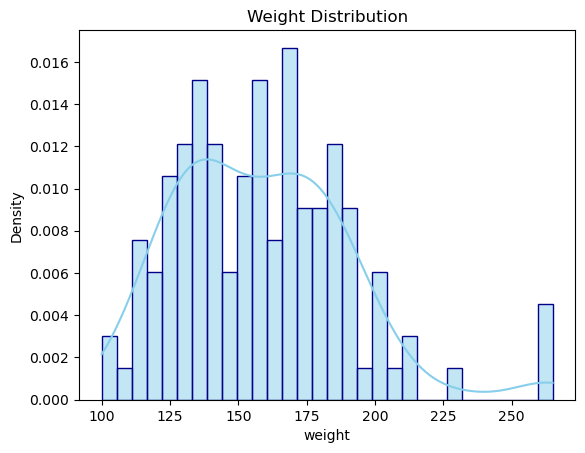

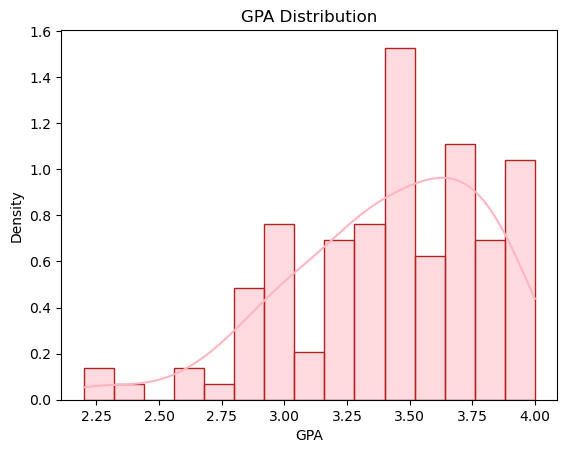

In [34]:
# Visualize distributions of weight and GPA
sns.histplot(data['weight'], bins=30, kde=True, stat="density", color='skyblue', edgecolor='darkblue')
plt.title('Weight Distribution')
plt.show()

sns.histplot(data['GPA'], bins=15, kde=True, stat="density", color='lightpink', edgecolor='firebrick')
plt.title('GPA Distribution')
plt.show()

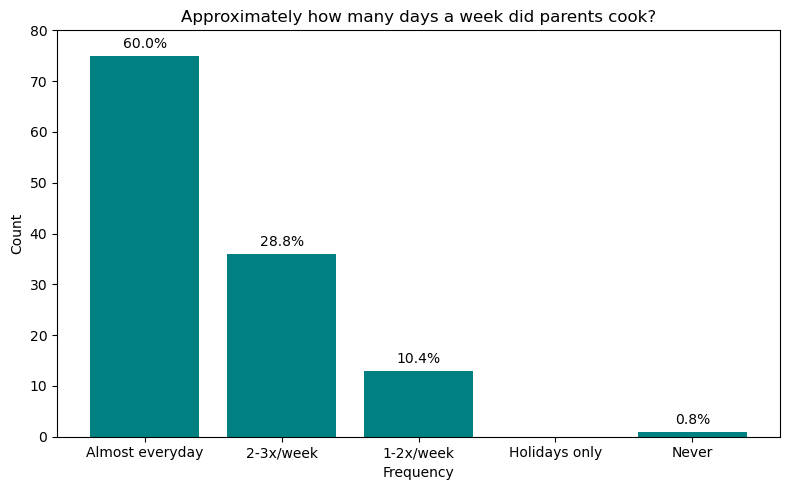

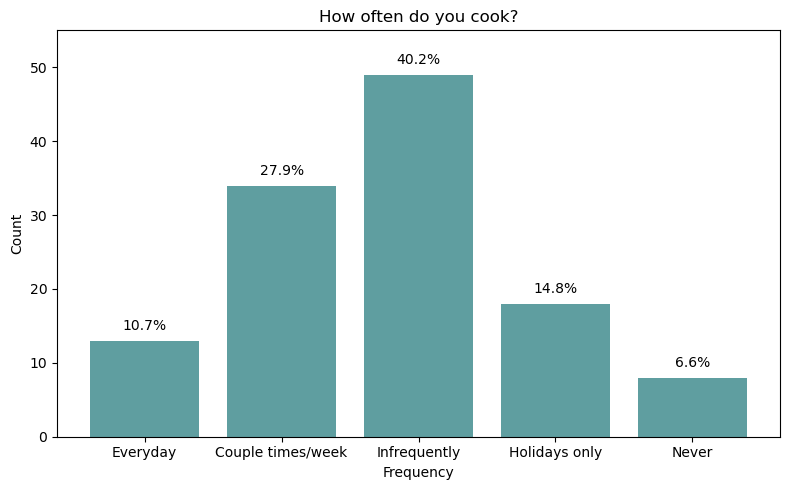

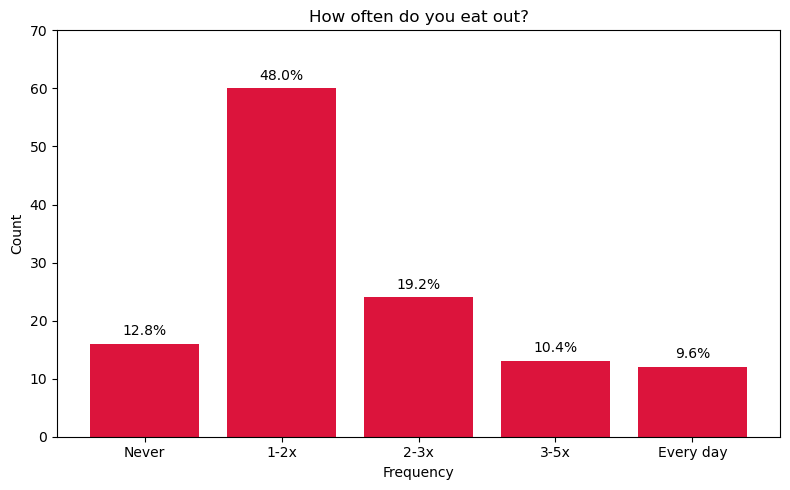

In [37]:
# Visualizing cooking variables
parents_counts = data['parents_cook'].value_counts()
labels = ['Almost everyday','2-3x/week','1-2x/week','Holidays only','Never']
plt.figure(figsize=(8,5))
bars1= plt.bar(parents_counts.index, parents_counts.values, color='teal')
total = parents_counts.values.sum()
for bar in bars1:
    height = bar.get_height()
    percentage = 100 * height / total
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.title('Approximately how many days a week did parents cook?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.ylim(0,80)
plt.tight_layout()
plt.xticks(ticks=range(1, 6), labels=labels)
plt.show()

cook_counts = data['cook'].value_counts()
labels = ['Everyday','Couple times/week','Infrequently','Holidays only','Never']
plt.figure(figsize=(8,5))
bars2 = plt.bar(cook_counts.index, cook_counts.values, color='cadetblue')
total = cook_counts.values.sum()
for bar in bars2:
    height = bar.get_height()
    percentage = 100 * height / total
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.title('How often do you cook?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.ylim(0,55)
plt.xticks(ticks=range(1, 6), labels=labels)
plt.show()

eatingout_counts = data['eating_out'].value_counts()
labels = ['Never','1-2x','2-3x','3-5x','Every day']

plt.figure(figsize=(8,5))
bars = plt.bar(eatingout_counts.index, eatingout_counts.values, color='crimson')
# Add percentage labels
total = eatingout_counts.values.sum()
for bar in bars:
    height = bar.get_height()
    percentage = 100 * height / total
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom')

# plt.bar(eatingout_counts.index, eatingout_counts.values, color='crimson')
plt.title('How often do you eat out?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.ylim(0,70)
plt.tight_layout()
plt.xticks(ticks=range(1, 6), labels=labels)
plt.show()

fruit_day
1     1
2     4
3    24
4    33
5    63
Name: count, dtype: int64


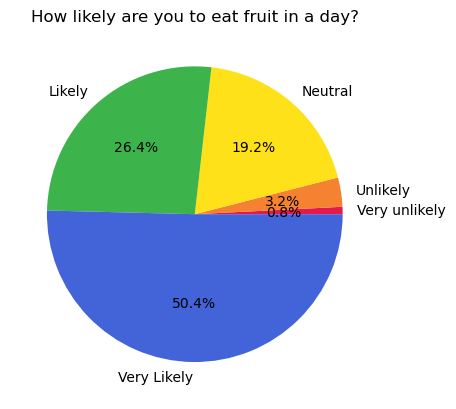

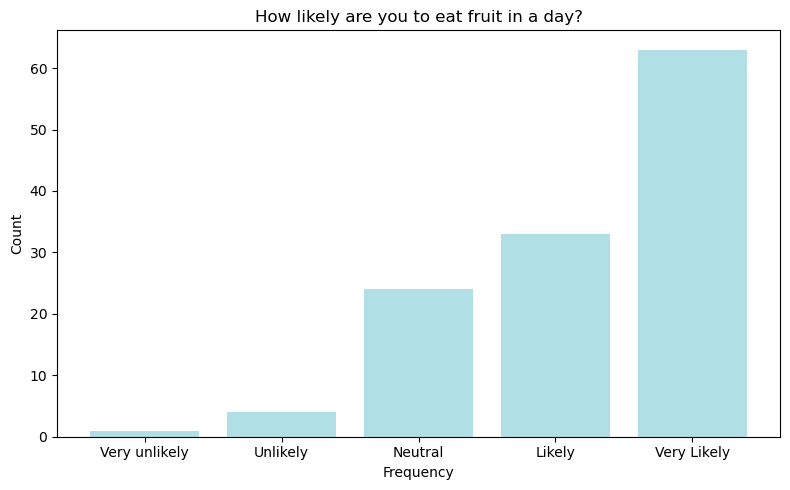

In [38]:
# Visualize fruit consumption
labels=['Very unlikely','Unlikely','Neutral','Likely','Very Likely']
fruit_counts = data['fruit_day'].value_counts().sort_index()
print(fruit_counts)

colors = ['#e6194b',  # red
          '#f58231',  # orange
          '#ffe119',  # yellow
          '#3cb44b',  # green
          '#4363d8']  # blue
fig, ax = plt.subplots()
ax.pie(fruit_counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title("How likely are you to eat fruit in a day?")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(fruit_counts.index, fruit_counts.values, color='powderblue')
plt.title('How likely are you to eat fruit in a day?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(ticks=range(1, 6), labels=labels)
plt.show()

fruit_day
1     1
2     4
3    24
4    33
5    63
Name: count, dtype: int64


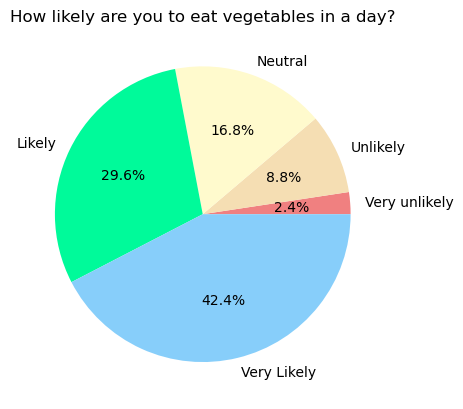

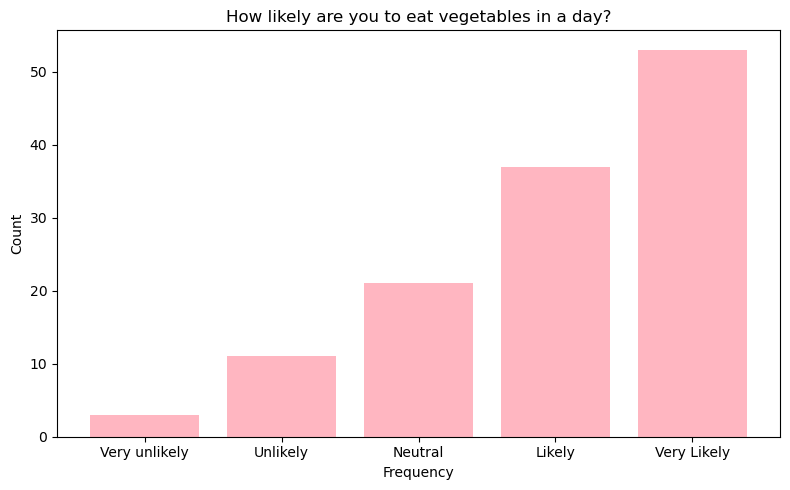

In [39]:
# Visualize vegetable consumption
labels=['Very unlikely','Unlikely','Neutral','Likely','Very Likely']
veggies_counts = data['veggies_day'].value_counts().sort_index()
print(fruit_counts)

colors = ['lightcoral',  # red
          'wheat',  # orange
          'lemonchiffon',  # yellow
          'mediumspringgreen',  # green
          'lightskyblue']  # blue
fig, ax = plt.subplots()
ax.pie(veggies_counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title("How likely are you to eat vegetables in a day?")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(veggies_counts.index, veggies_counts.values, color='lightpink')
plt.title('How likely are you to eat vegetables in a day?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(ticks=range(1, 6), labels=labels)
plt.show()

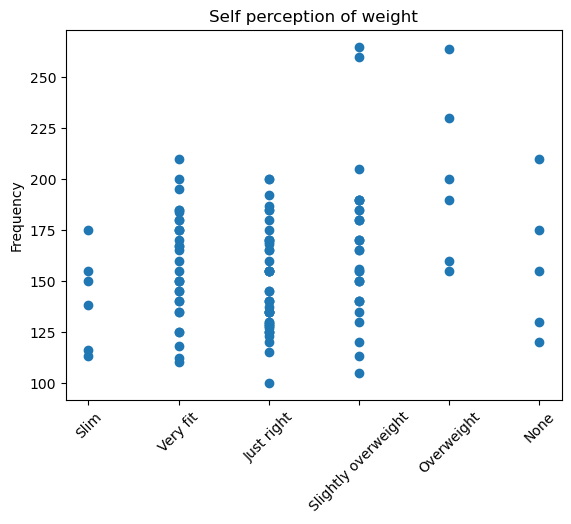

In [40]:
# Visualize self-perception of weight
perception_counts = data['self_perception_weight'].value_counts().sort_index()

labels = ['Slim','Very fit','Just right','Slightly overweight','Overweight','None']
# 'None' corresponds to: "I don't think of myself in these terms"
plt.scatter(df['self_perception_weight'], df['weight'])
plt.xticks(ticks=range(1, 7), labels=labels, rotation=45)
plt.title('Self perception of weight')
plt.ylabel('Frequency')
plt.show()

vitamins
1    61
2    64
Name: count, dtype: int64


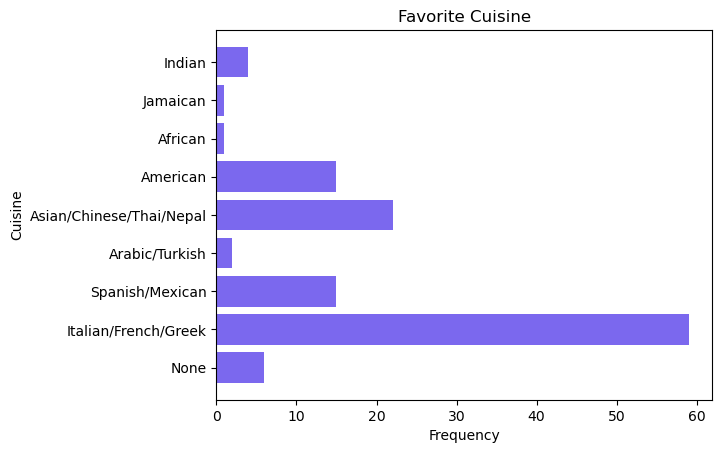

In [42]:
# Visualize vitamins and favorite cuisine
vitamins_counts = data['vitamins'].value_counts().sort_index()
print(vitamins_counts)

favcuisine_counts = data['fav_cuisine_coded'].value_counts().sort_index()
labels = ['None','Italian/French/Greek','Spanish/Mexican','Arabic/Turkish','Asian/Chinese/Thai/Nepal','American','African','Jamaican','Indian']
# 'None' corresponds to: "I don't think of myself in these terms"
plt.barh(favcuisine_counts.index, favcuisine_counts.values, color='mediumslateblue')
plt.yticks(ticks=range(0, 9), labels=labels)
plt.title('Favorite Cuisine')
plt.ylabel('Cuisine')
plt.xlabel('Frequency')
plt.show()

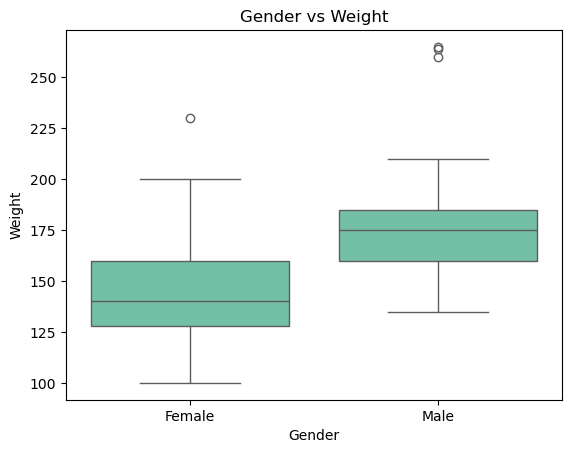

In [44]:
# Visualize gender and weight
sns.boxplot(x=df['Gender'], y=df['weight'], color='mediumaquamarine')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.xticks(ticks=[0, 1], labels=['Female','Male'])
plt.show()

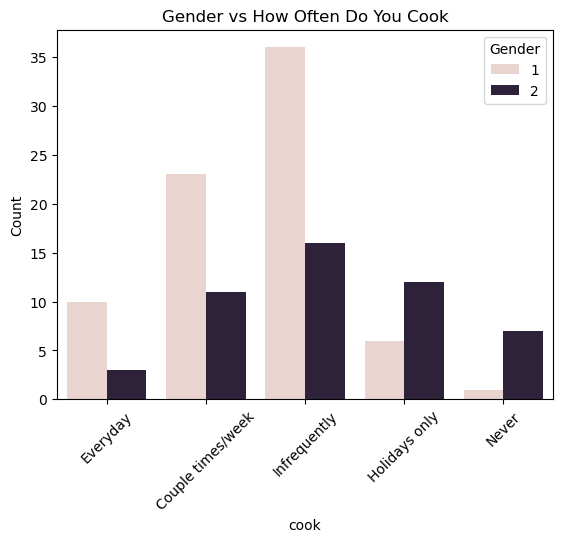

In [45]:
# Visualize gender and cooking
sns.countplot(x='cook', hue='Gender', data=df)
plt.title('Gender vs How Often Do You Cook')
plt.ylabel('Count')
plt.xticks(ticks=range(0,5), labels = ['Everyday','Couple times/week','Infrequently','Holidays only','Never'], rotation=45)
plt.show()

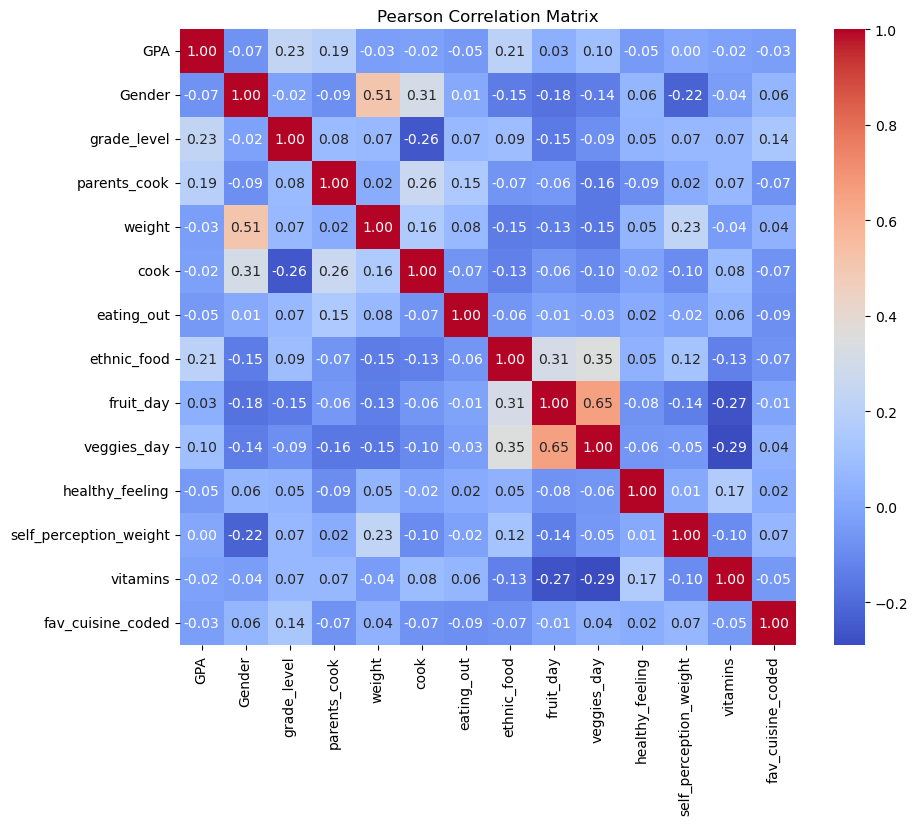

In [46]:
#Pearson correlation
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson Correlation Matrix")
plt.show()

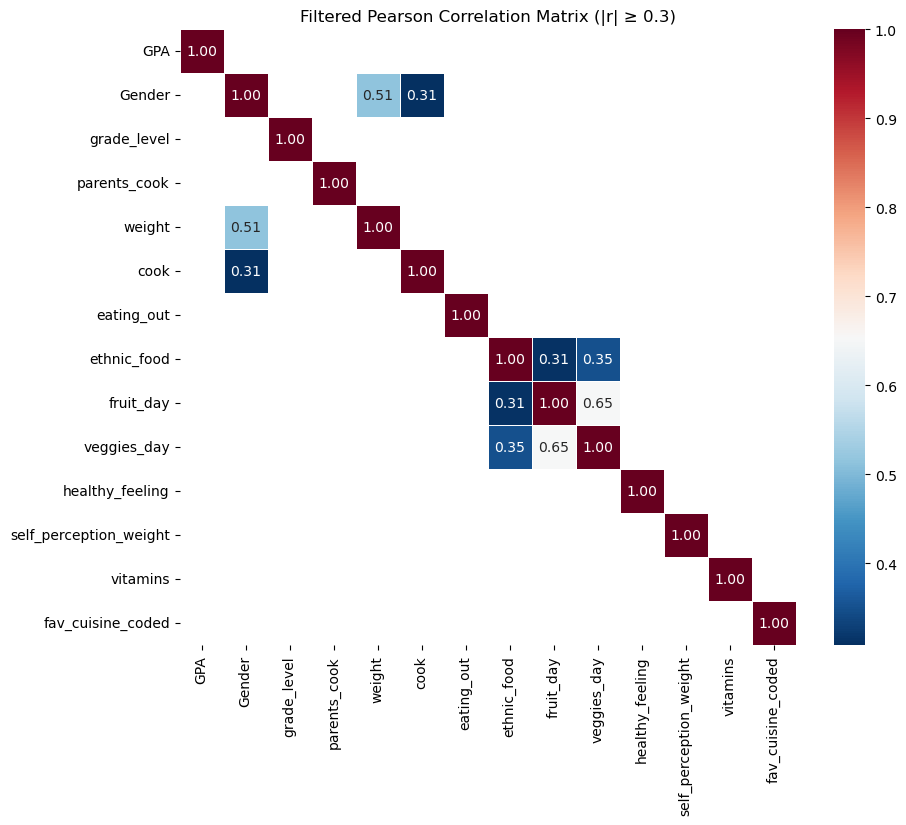

In [47]:
# Create a mask for correlations with abs value < 0.3
mask = (np.abs(corr_matrix) < 0.3)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            cmap='RdBu_r', 
            fmt=".2f", 
            square=True, 
            linewidths=0.5,
            cbar=True)
plt.title("Filtered Pearson Correlation Matrix (|r| ≥ 0.3)")
plt.show()

weight                    1.356273
self_perception_weight    0.176837
fav_cuisine_coded         0.163722
grade_level               0.118304
ethnic_food               0.112594
eating_out                0.095915
healthy_feeling           0.048478
cook                      0.043687
Gender                    0.041797
vitamins                  0.006173
parents_cook              0.000000
fruit_day                 0.000000
veggies_day               0.000000
Name: MI Scores, dtype: float64


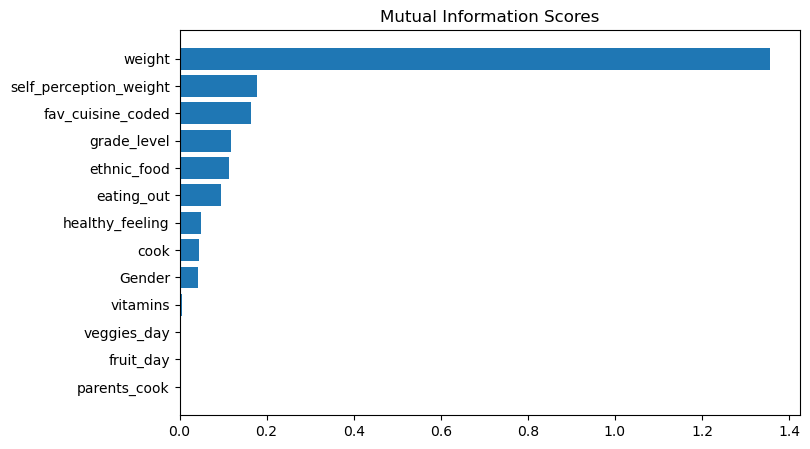

In [49]:
X = df.copy() # make a copy
X = X.dropna() # remove rows with NA for now
X = X.apply(lambda col: col.astype(int) if col.dtype == 'float' else col) # convert all floats to ints
y = X.pop("GPA")

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

#### Interpretation:
Mutual Information quantifies how much information one variable gives about another.  
A higher MI score corresponds to a stronger non-linear and linear dependency with the target.  
According to the plot above showing how much each feature contributes to predicting **GPA** using mutual information.  

**Most Informative Features:**  
* weight (MI ≈ 1.71): most informative variable for predicting the target
* self_perception_weight (MI ≈ 0.32): moderately informative, reflects how someone’s perception of their body relates to the target.
healthy_feeling (MI ≈ 0.13): provides some predictive signal, although weaker.  

**Less Informative Features:**  
* veggies_day, cook, fruit_day, ethnic_food: have low MI values (< 0.1), suggesting a weak relationship with the target.

**Non-informative Features:**. 
* Gender, grade_level, parents_cook, eating_out, vitamins (MI = 0): these variables do not contribute any useful information about the target

## Summarized notes, insights, and interpretation

* Most common favorite cuisine is Italian/French/Greek
* Gender and cooking were highly correlated (r=0.31), as was gender and weight (as expected) (r=0.51).
* Ethnic food and veggies day (r=0.35) and fruit day (r=0.31) are highly correlated
* Fruit day and veggies day are highly correlated (r=0.65)
* The distribution of population is 60.8% female, 39.2% male
* Weight distribution is skewed to the right
* GPA distribution is skewed to the left
* Grade level distribution is somewhat evenly distributed (29.6% freshman, 25.6% sophomores, 22.4% juniors, and 22.4% seniors)
* 60% of students reported that their parents cooked almost everyday of the week (parents_cook)
* 10% of students reported that they cook every day (cook)
* 42% of students reported that they cook infrequently
* 48% of students reported that they eat out 1-2 times a week (eating_out)
* 10% of students reported that they eat out every day